In [28]:
#Import relevant libraries
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
#Load NSF Awards Dataset. This dataset consists of awards in AI and ML that NSF awarded in 2019-2020

data = pd.read_csv("/content/drive/MyDrive/Grad School-Files/Job Search/Data Science Basics/churn.csv")
data = data.dropna(axis=0) #drop null rows

In [71]:
#Print info
print(data.info())

#Is there null data in the dataframe?
print(data.isnull().sum())

#Is there duplicated data in the data frame?
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_nu

We see that there is some categorical data that needs to be recoded into a numerical format

In [72]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
# perform one hot encoding using get_dummies
data_gender = pd.get_dummies(data['gender'])
data_country = pd.get_dummies(data['country'])

# add the one hot encoded columns to the original dataframe
data = pd.concat([data, data_gender, data_country], axis=1)

#Drop redundant columns
data = data.drop(columns=['gender', 'country', 'Female', 'France', 'Germany', 'Spain'])

data.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0


## 1. Exploratory Analysis

In [23]:
#Get descriptive statistics
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Male
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.545700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000


array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'products_number'}>],
       [<Axes: title={'center': 'credit_card'}>,
        <Axes: title={'center': 'active_member'}>,
        <Axes: title={'center': 'estimated_salary'}>],
       [<Axes: title={'center': 'churn'}>,
        <Axes: title={'center': 'Male'}>, <Axes: >]], dtype=object)

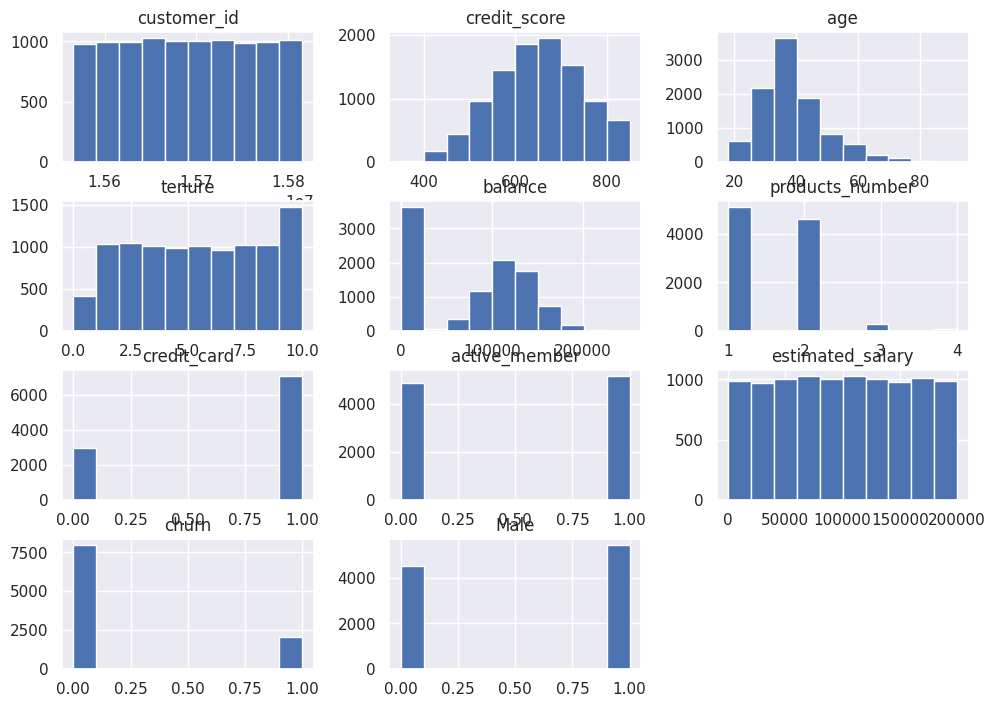

In [24]:
#Plot histograms
data.hist()

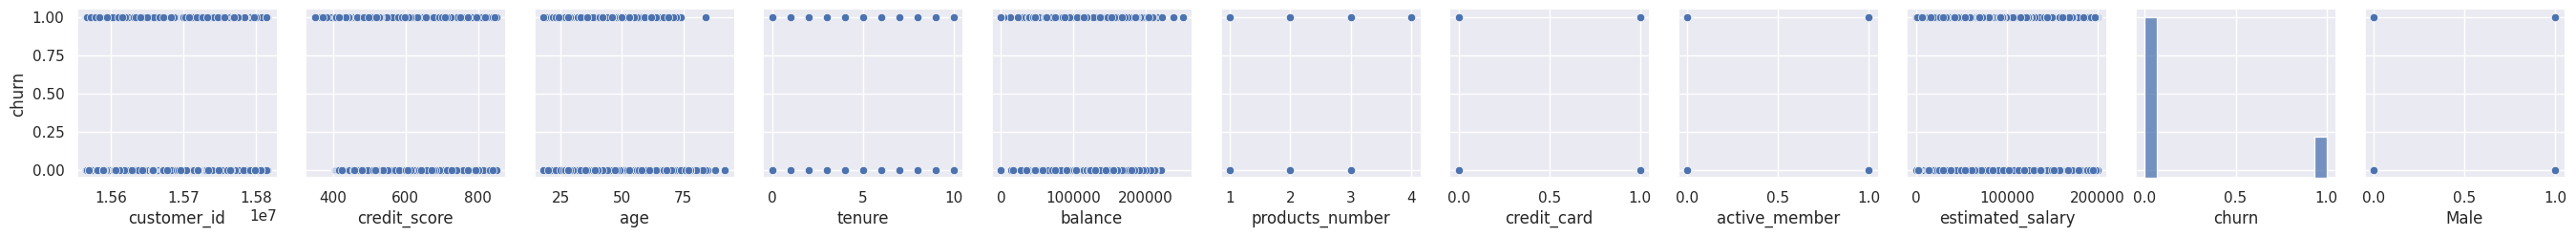

In [25]:
#We care about predicting churn, so let's plot that against all other numeric variables
sns.pairplot(
    data,
    x_vars= data.columns,
    y_vars=["churn"],
)


In [26]:
#Let's look at the correlations, since we are looking at categorical correlations we need to use Spearman's rank or Chi-square tests to assess correlation
#Compute spearman rank correlation using scipy
from scipy.stats import spearmanr
r, p = spearmanr(data["credit_score"], data["churn"])
print('Spearman Rank Correlation between credit_score and churn is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["age"], data["churn"])
print('Spearman Rank age between age and churn is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["tenure"], data["churn"])
print('Spearman Rank tenure between tenure and churn is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["balance"], data["churn"])
print('Spearman Rank balance between balance and churn is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["products_number"], data["churn"])
print('Spearman Rank Correlation between products_number and churn is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["credit_card"], data["churn"])
print('Spearman Rank age between credit_card and churn is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["active_member"], data["churn"])
print('Spearman Rank tenure between activea_member and churn is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["estimated_salary"], data["churn"])
print('Spearman Rank balance between estimated_salary and churn is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["Male"], data["churn"])
print('Spearman Rank Correlation between Male and churn is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["France"], data["churn"])
print('Spearman Rank age between France and churn is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["Germany"], data["churn"])
print('Spearman Rank tenure between Germany and churn is %0.3f and p-value is %0.3f' % (r,p))


r, p = spearmanr(data["Spain"], data["churn"])
print('Spearman Rank balance between Spain and churn is %0.3f and p-value is %0.3f' % (r,p))

Spearman Rank Correlation between credit_score and churn is -0.023 and p-value is 0.020
Spearman Rank age between age and churn is 0.324 and p-value is 0.000
Spearman Rank tenure between tenure and churn is -0.014 and p-value is 0.162
Spearman Rank balance between balance and churn is 0.111 and p-value is 0.000
Spearman Rank Correlation between products_number and churn is -0.125 and p-value is 0.000
Spearman Rank age between credit_card and churn is -0.007 and p-value is 0.475
Spearman Rank tenure between activea_member and churn is -0.156 and p-value is 0.000
Spearman Rank balance between estimated_salary and churn is 0.012 and p-value is 0.227
Spearman Rank Correlation between Male and churn is -0.107 and p-value is 0.000


KeyError: ignored

Based on the Spearman's rank correlations exist mainly between churn and age, balance,

In [ ]:
from scipy.stats import chi2_contingency

#Run Chi-Squared tests
table = pd.crosstab(data["credit_score"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test between credit_score and churn is %0.3f and p-value is %0.3f' % (r,p))

table = pd.crosstab(data["age"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test age between age and churn is %0.3f and p-value is %0.3f' % (r,p))

table = pd.crosstab(data["tenure"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test tenure between tenure and churn is %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["balance"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test balance between balance and churn is %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["products_number"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test Correlation between products_number and churn is %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["credit_card"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test age between credit_card and churn is %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["active_member"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test tenure between activea_member and churn is %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["estimated_salary"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test balance between estimated_salary and churn is %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["Male"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test Correlation between Male and churn is %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["France"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test age between France and churn is %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["Germany"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test tenure between Germany and churn is %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["Spain"], data["churn"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi Squared test balance between Spain and churn is %0.3f and p-value is %0.3f' % (chi2, p))

<Axes: >

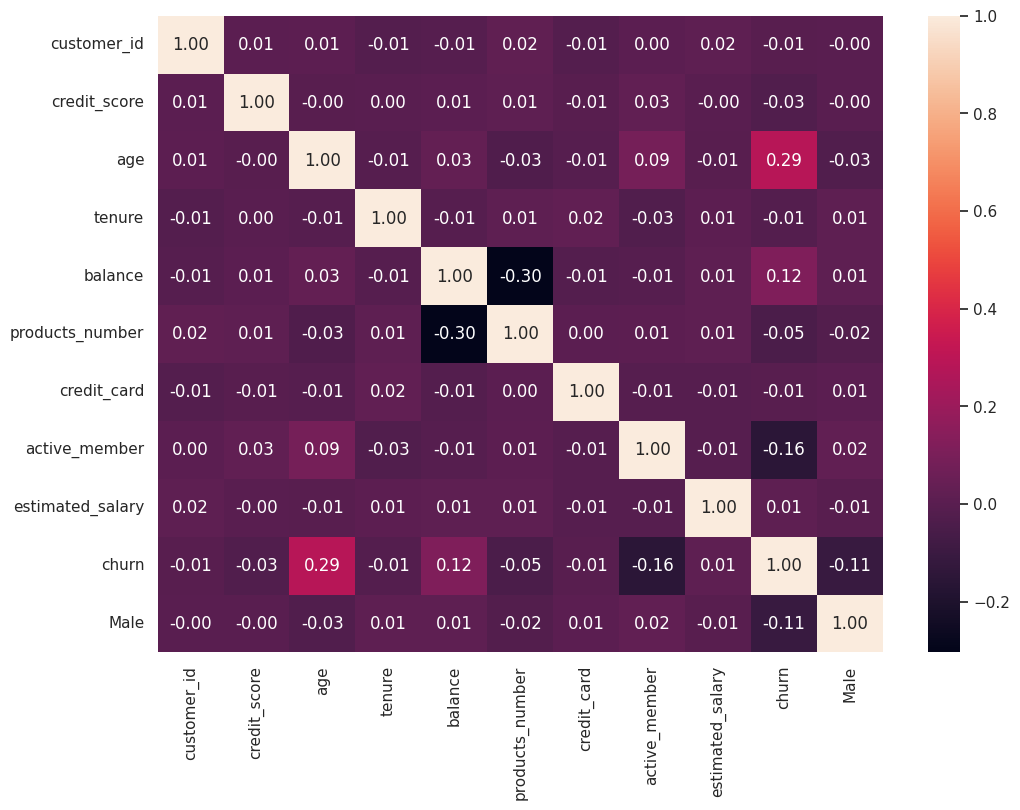

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(), annot=True, fmt='.2f')

Based on the chi-squared tests significant correlations exist between churn and age, balance, credit_score (mild), products_number, active_member, Male, France, Germany and Spain. But, France, Germany and Spain are correlated, so let's drop those columns for now

#. Logistic Regression


In [74]:
data.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0


In [82]:
#Extract independent and dependent variable
X = data.drop(columns= ['churn'])
y = data['churn']

In [76]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=23, stratify=y)

In [77]:
# Logistic classifier
lr = LogisticRegression()
#Fit model
lr.fit(X_train, y_train)
#Make prediction
y_pred = lr.predict(X_test)
#Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

#Print confusion matrix
print(confusion_matrix(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('AUC: ', roc_auc_score(y_test, y_pred))

[[1593    0]
 [ 407    0]]
Precision:  0.0
Recall:  0.0
AUC:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The predictor does a good job at predicting when churn is 0 but cannot predict well when churn is 1.That's because the dataset is unbalanced to begin with as there are a lot more no churn labels than there are churn labels. Given that the precision and recall

In [80]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

#Define a scoring function that gives classification report
def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import math

#Define model
lr = LogisticRegression()
#Define cross-validation method to use with 5 folds
cv = KFold(n_splits=5, random_state=1, shuffle=True)
#use k-fold CV to evaluate model
scores = cross_val_score(lr, X, y, scoring=make_scorer(classification_report_with_accuracy_score), cv=cv, n_jobs=-1)

#Print results
print('Average accuracy is %0.2f' % scores.mean())

Average accuracy is 0.80


Even though the accuracy of the model is pretty good, the precision, churn and ROC AUC values tell us that the model is basically worthle